# Training logs

### Setup

In [1]:
import os
from os.path import join

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
src_path = os.path.abspath(join("..", "language-modeling"))
%cd $src_path

/media/pips/Data/Projects/NLU-UniTN-2022/project/language-modeling


In [3]:
CSV_PATH = join("results", "csv")
NAMES = os.listdir(CSV_PATH)

In [4]:
for i, n in enumerate(NAMES):
    print(f"{i}: {n}")

0: baseline.csv
1: baseline_dropout.csv
2: baseline_dropout_adam.csv
3: merity_ad.csv
4: merity_ad_nohh.csv
5: merity_ad_nohh_1024.csv
6: merity_ad_nohh_1024_adam.csv
7: merity_ad_nohh_1024_ps.csv
8: merity_ad_nohh_1024_ps_long.csv
9: merity_ad_nohh_1024_ps_notying.csv
10: merity_ad_nohh_1024_ps_tbptt_long.csv
11: merity_ad_nohh_1024_tbptt.csv
12: merity_ad_nohh_adam.csv
13: merity_ad_nohh_tbptt.csv
14: merity_base.csv
15: merity_ed.csv
16: merity_eld.csv
17: merity_eld_1024.csv
18: merity_ld.csv
19: merity_wd.csv
20: merity_wd_nohh.csv
21: merity_wd_nolstm.csv


In [5]:
def plot_loss_ppl(exp_name: str):
    df = pd.read_csv(f"{join(CSV_PATH, exp_name)}.csv")

    train_loss = df[df.metric == "Loss/Train"].value.values
    train_ppl = np.exp(train_loss)
    val_loss = df[df.metric == "Loss/Valid"].value.values[1:]
    val_ppl = np.exp(val_loss)

    print(f"Train last step perplexity: {train_ppl[-1]:.2f}")
    print(f"Validation last step perplexity: {val_ppl[-1]:.2f}")

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    plt.suptitle(exp_name)
    axs[0].plot(train_loss, label='Train')
    axs[0].plot(val_loss, label='Validation')
    axs[1].plot(train_ppl, label='Train')
    # axs[1].axhline(y=train_ppl[-1], color='b', linestyle='--')
    axs[1].plot(val_ppl, label='Validation')
    # axs[1].axhline(y=val_ppl[-1], color='orange', linestyle='--')


    axs[0].set_ylabel('Loss')
    axs[1].set_ylabel('Perplexity')
    axs[1].set_ylim(bottom=0, top=200)

    axs[0].set_xlabel('Epoch')
    axs[1].set_xlabel('Epoch')
    axs[0].legend()
    axs[1].legend()

    plt.show()

In [6]:
def plot_loss_ppl_report(exps: str | list[str]):
    if isinstance(exps, str):
        exps = [exps]
    dfs = [pd.read_csv(f"{join(CSV_PATH, exp_name)}.csv") for exp_name in exps]

    train_losses = [df[df.metric == "Loss/Train"].value.values for df in dfs]
    train_ppls = [np.exp(train_loss) for train_loss in train_losses]
    val_losses = [df[df.metric == "Loss/Valid"].value.values[1:] for df in dfs]
    val_ppls = [np.exp(val_loss) for val_loss in val_losses]

    # utility for generating consistent colors
    from itertools import cycle
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = cycle(prop_cycle.by_key()['color'])


    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    for train_loss, val_loss, train_ppl, val_ppl, exp_name in zip(train_losses, val_losses, train_ppls, val_ppls, exps):
        color = next(colors)
        axs[0].plot(train_loss, label=f"Train {exp_name}", color=color, linestyle='dotted')
        axs[0].plot(val_loss, label=f" Val {exp_name}", color=color)
        axs[1].plot(train_ppl, label=f"Train {exp_name}", color=color, linestyle='dotted')
        axs[1].plot(val_ppl, label=f" Val {exp_name}", color=color)
    # axs[0].plot(train_loss, label='Train')
    # axs[0].plot(val_loss, label='Validation')
    # axs[1].plot(train_ppl, label='Train')
    # # axs[1].axhline(y=train_ppl[-1], color='b', linestyle='--')
    # axs[1].plot(val_ppl, label='Validation')
    # # axs[1].axhline(y=val_ppl[-1], color='orange', linestyle='--')


    axs[0].set_ylabel('Loss')
    axs[1].set_ylabel('Perplexity')
    axs[1].set_ylim(bottom=0, top=200)

    axs[0].set_xlabel('Epoch')
    axs[1].set_xlabel('Epoch')
    axs[0].legend()
    axs[1].legend()

    plt.show()

## Baseline

Train last step perplexity: 25.61
Validation last step perplexity: 195.19


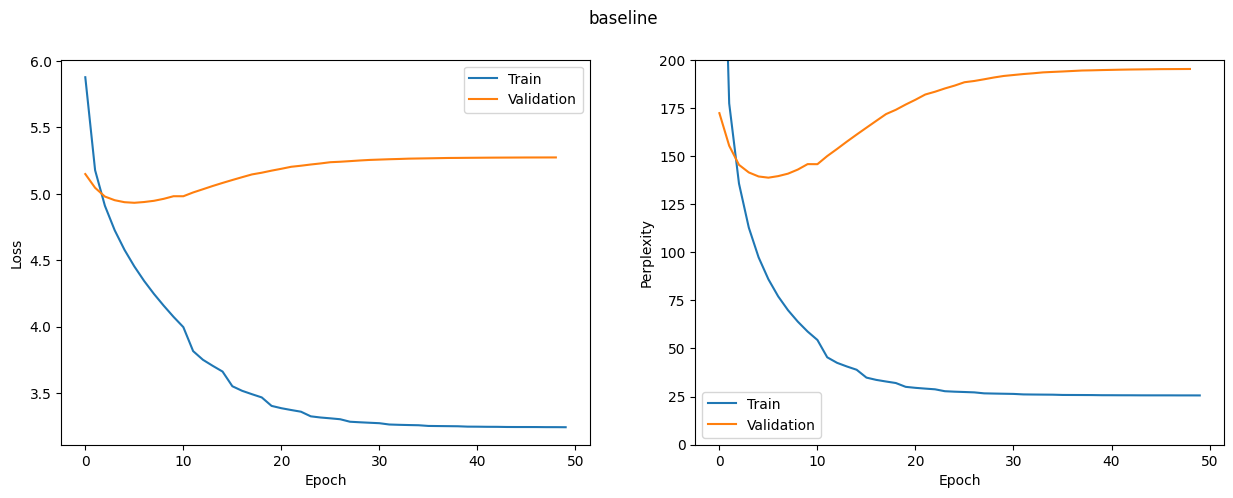

In [7]:
plot_loss_ppl("baseline")

Train last step perplexity: 48.22
Validation last step perplexity: 119.32


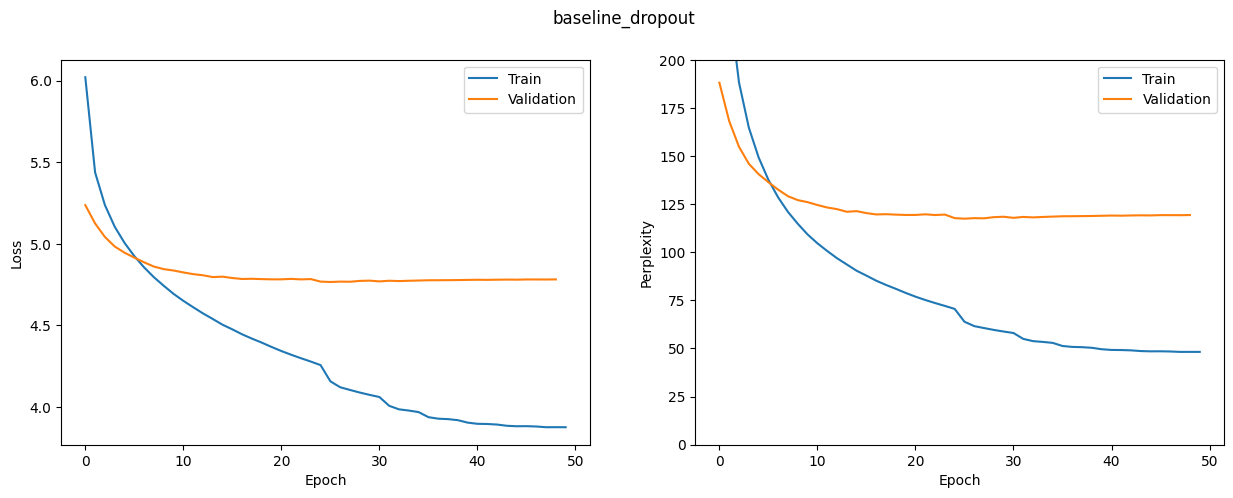

In [8]:
plot_loss_ppl("baseline_dropout")

Train last step perplexity: 47.39
Validation last step perplexity: 119.54


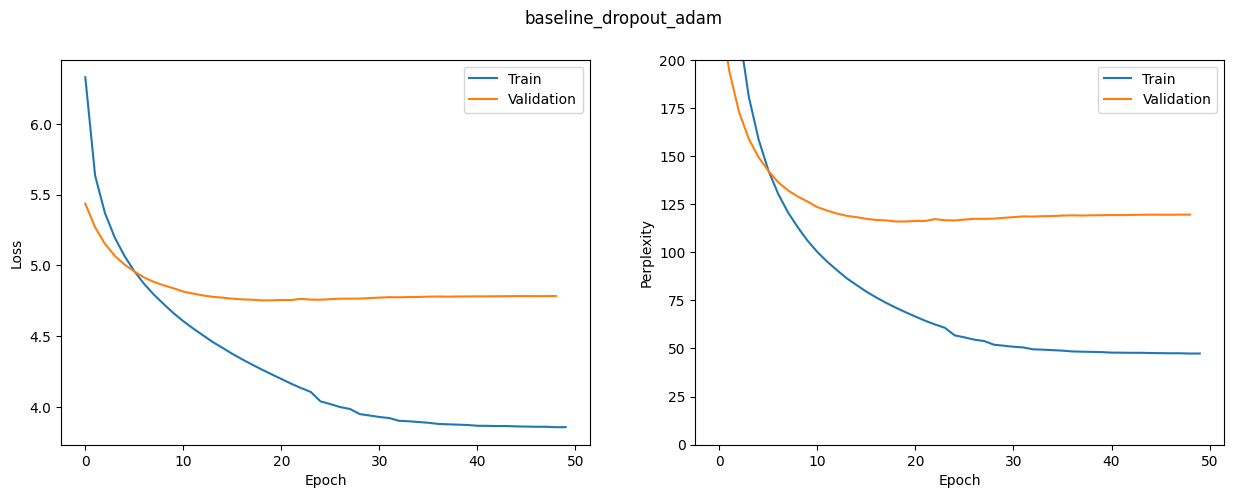

In [9]:
plot_loss_ppl("baseline_dropout_adam")

## Merity

Train last step perplexity: 32.75
Validation last step perplexity: 124.27


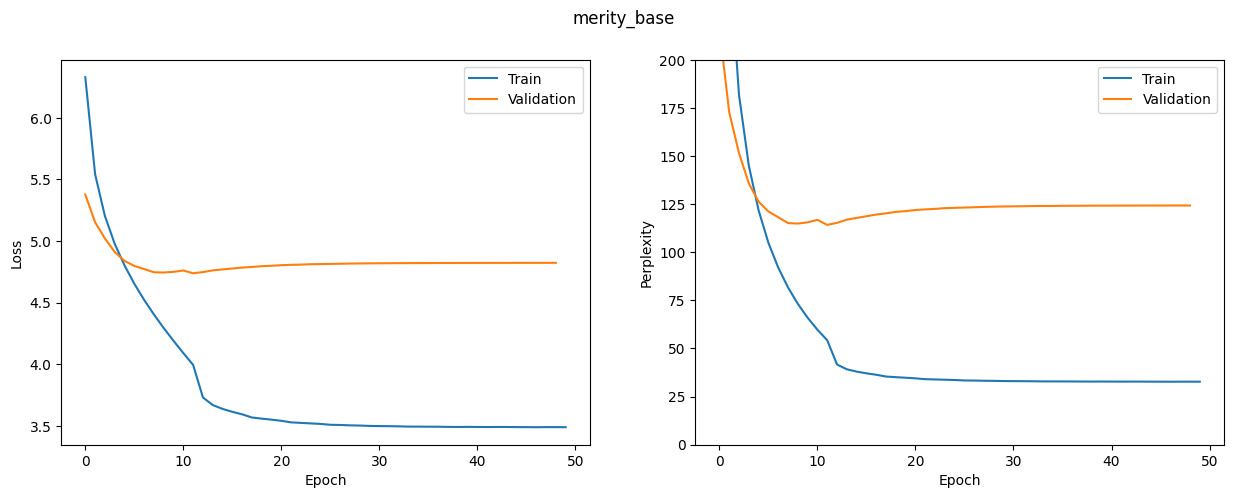

In [10]:
plot_loss_ppl("merity_base")

Train last step perplexity: 43.72
Validation last step perplexity: 108.25


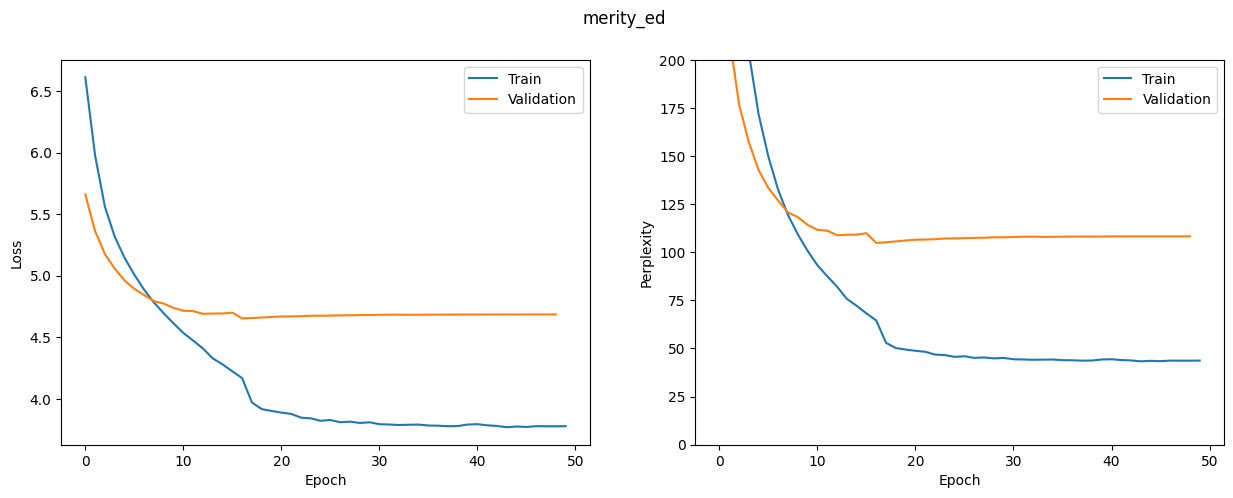

In [11]:
plot_loss_ppl("merity_ed")

Train last step perplexity: 35.88
Validation last step perplexity: 107.83


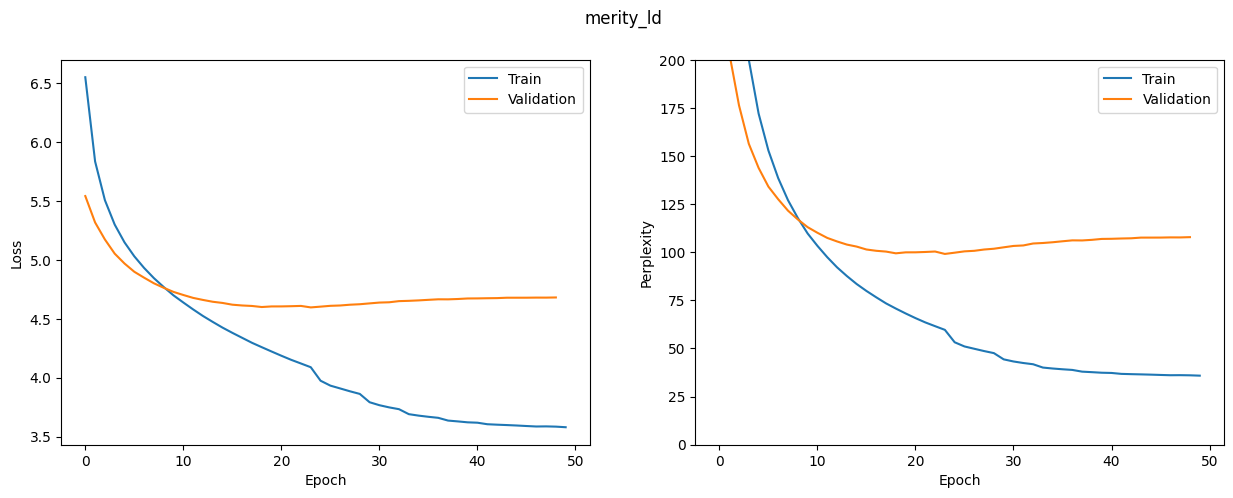

In [12]:
plot_loss_ppl("merity_ld")

Train last step perplexity: 48.39
Validation last step perplexity: 103.98


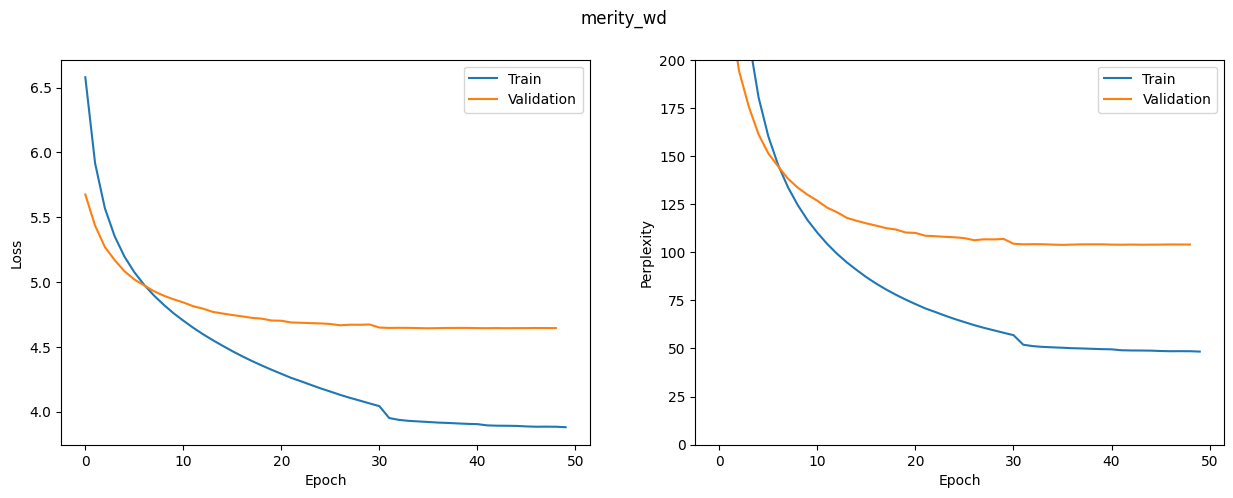

In [13]:
plot_loss_ppl("merity_wd")

Train last step perplexity: 45.49
Validation last step perplexity: 103.72


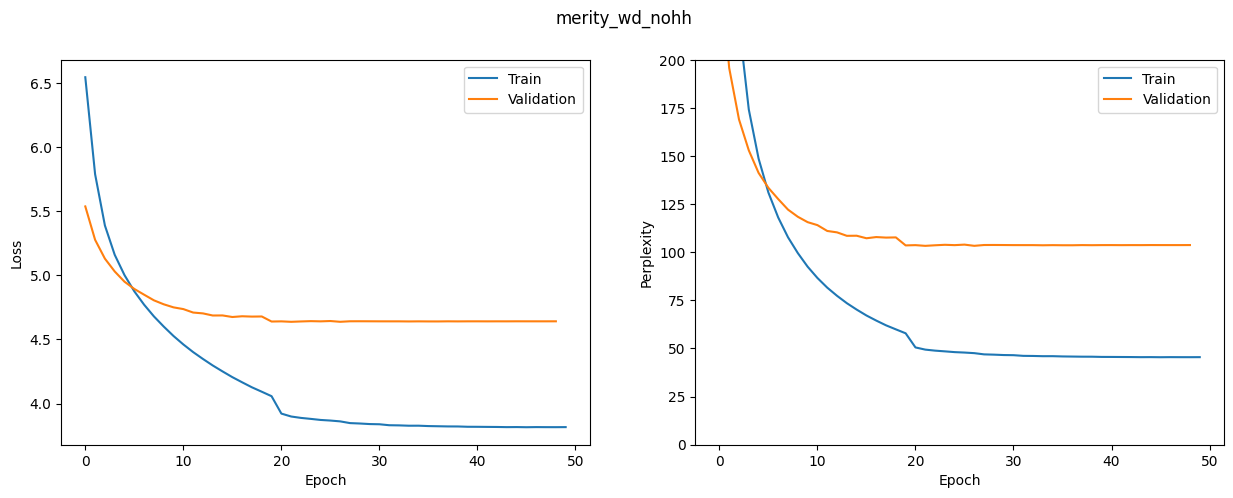

In [14]:
plot_loss_ppl("merity_wd_nohh")

Train last step perplexity: 42.35
Validation last step perplexity: 106.56


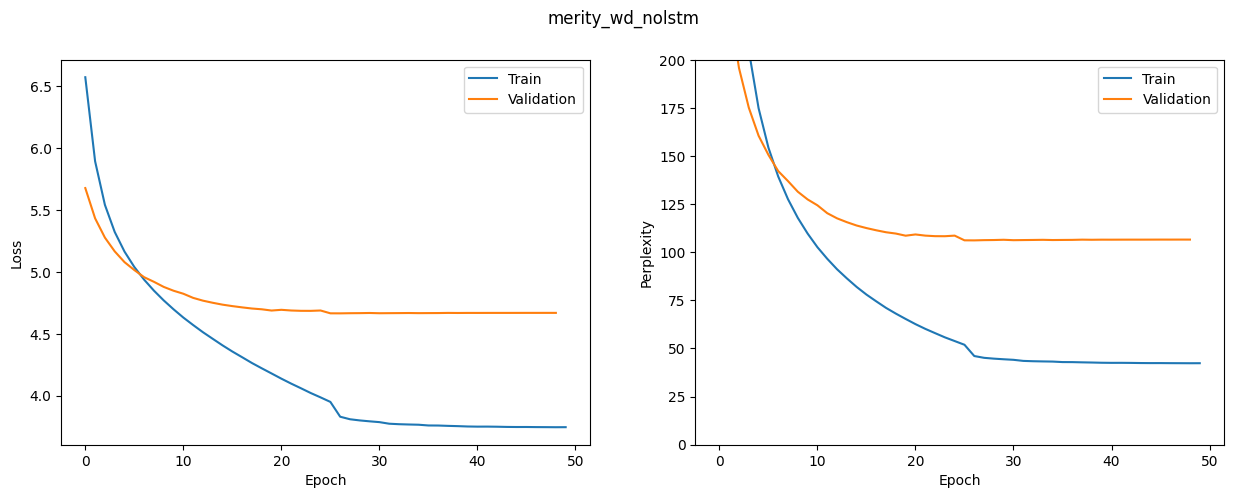

In [15]:
plot_loss_ppl("merity_wd_nolstm")

Train last step perplexity: 54.75
Validation last step perplexity: 90.69


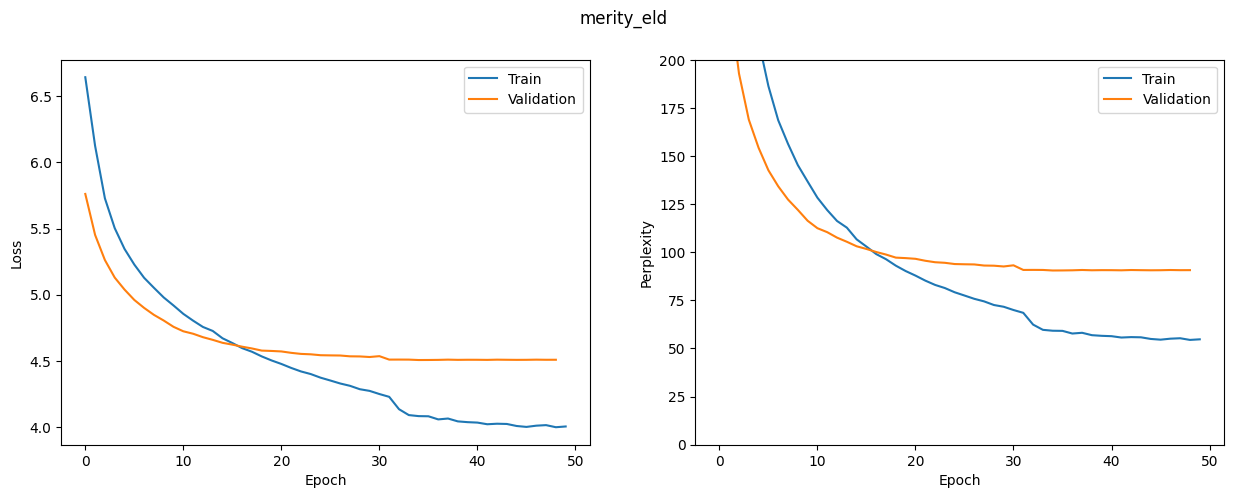

In [16]:
plot_loss_ppl("merity_eld")

Train last step perplexity: 92.73
Validation last step perplexity: 96.70


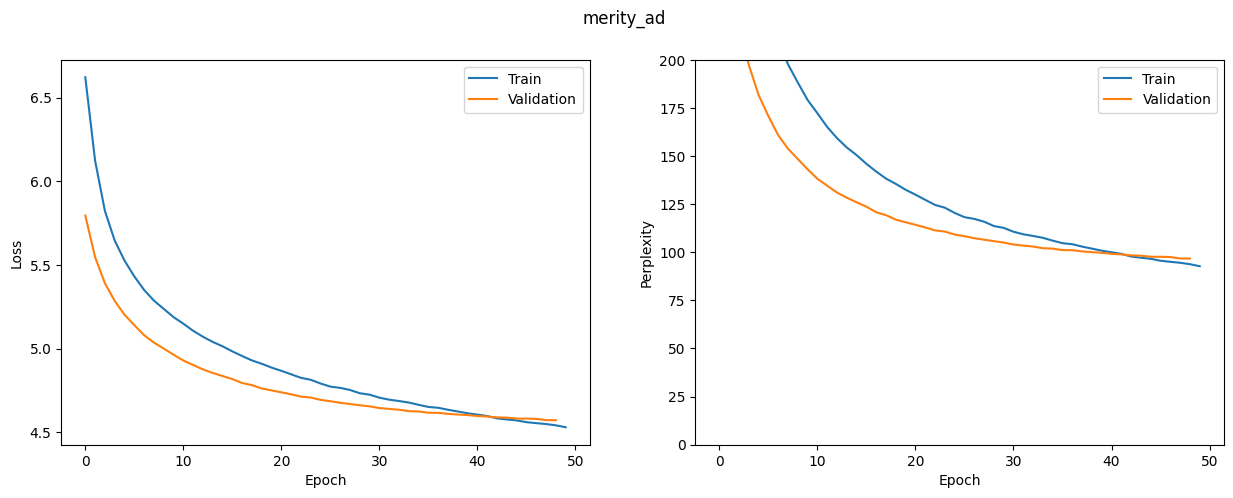

In [17]:
plot_loss_ppl("merity_ad")

Train last step perplexity: 84.76
Validation last step perplexity: 91.34


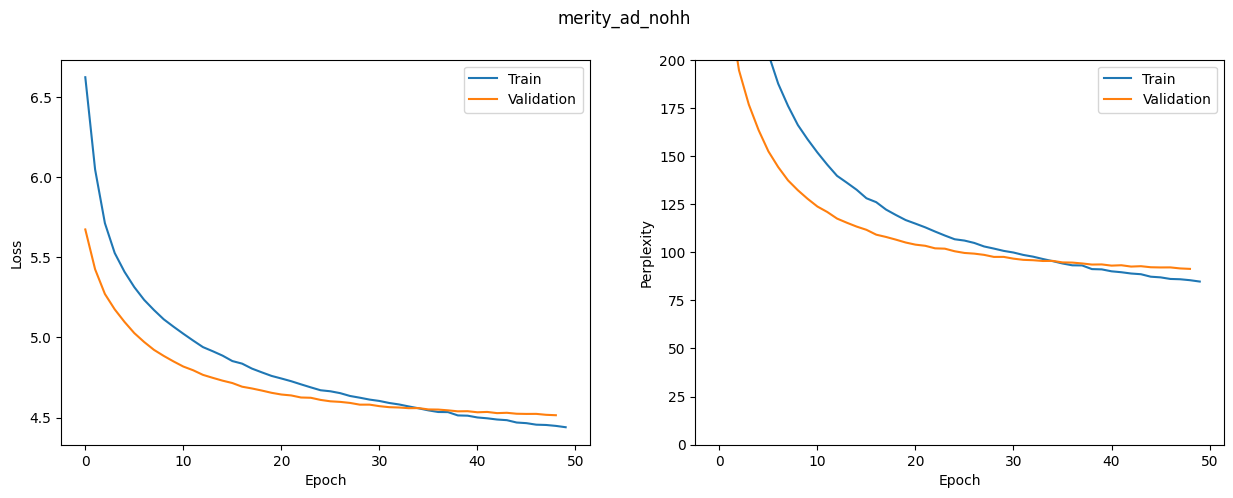

In [18]:
plot_loss_ppl("merity_ad_nohh")

Train last step perplexity: 84.83
Validation last step perplexity: 91.55


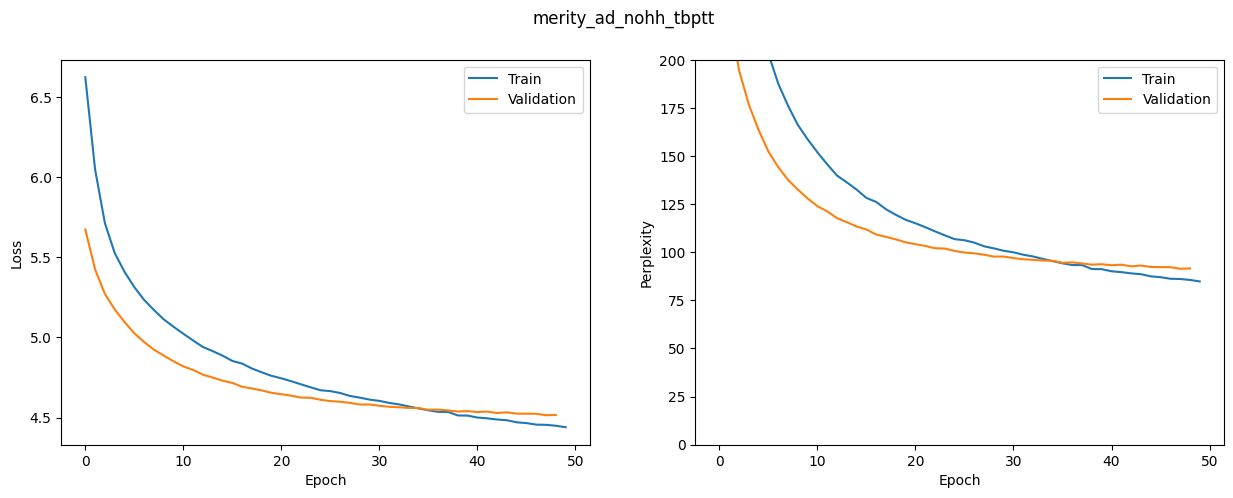

In [19]:
plot_loss_ppl("merity_ad_nohh_tbptt")

Train last step perplexity: 79.55
Validation last step perplexity: 86.28


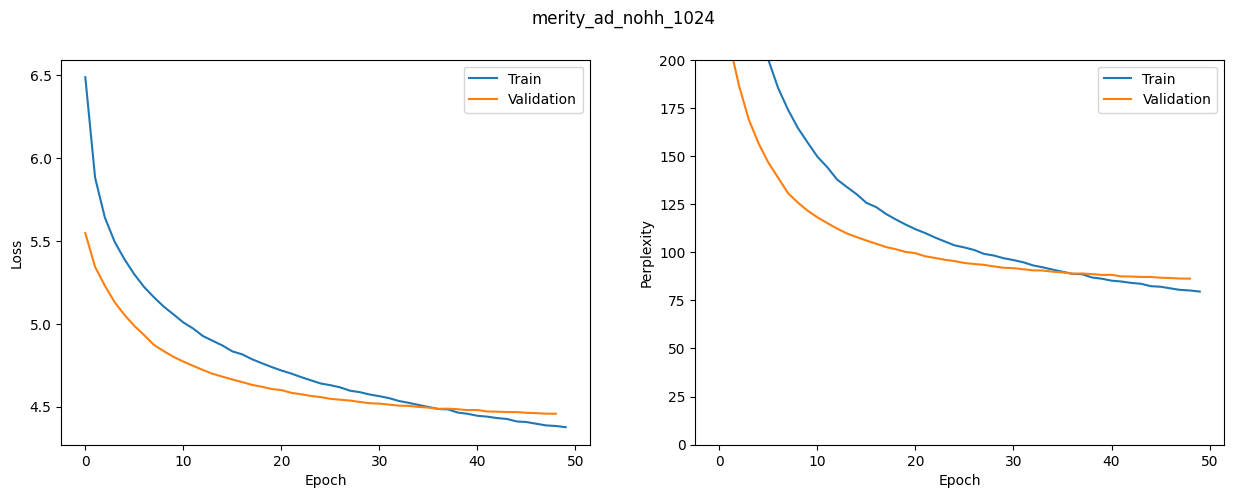

In [20]:
plot_loss_ppl("merity_ad_nohh_1024")

Train last step perplexity: 43.81
Validation last step perplexity: 91.59


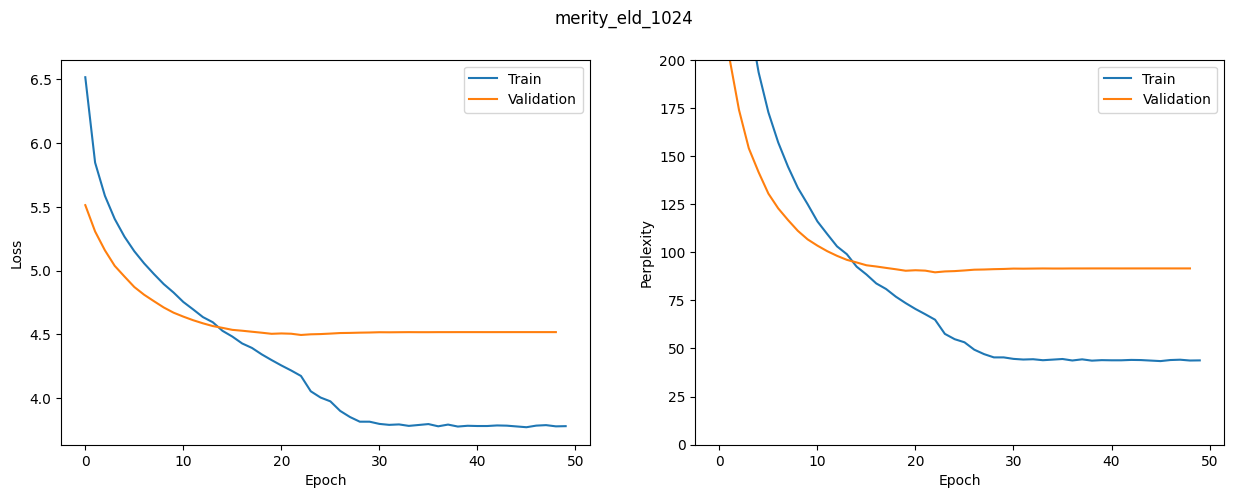

In [21]:
plot_loss_ppl("merity_eld_1024")

Train last step perplexity: 86.31
Validation last step perplexity: 96.53


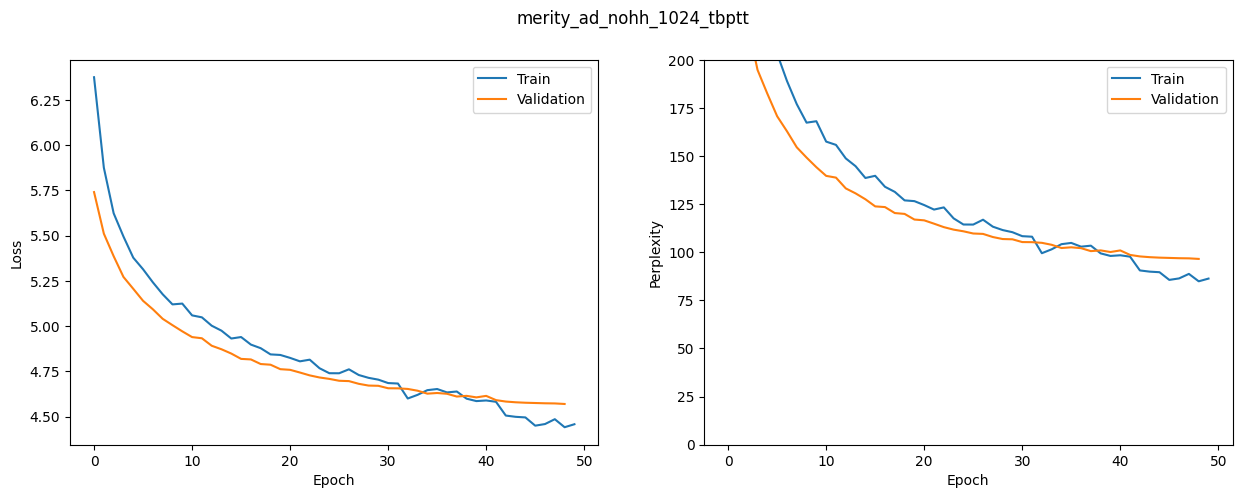

In [22]:
plot_loss_ppl("merity_ad_nohh_1024_tbptt")

Train last step perplexity: 100.67
Validation last step perplexity: 87.11


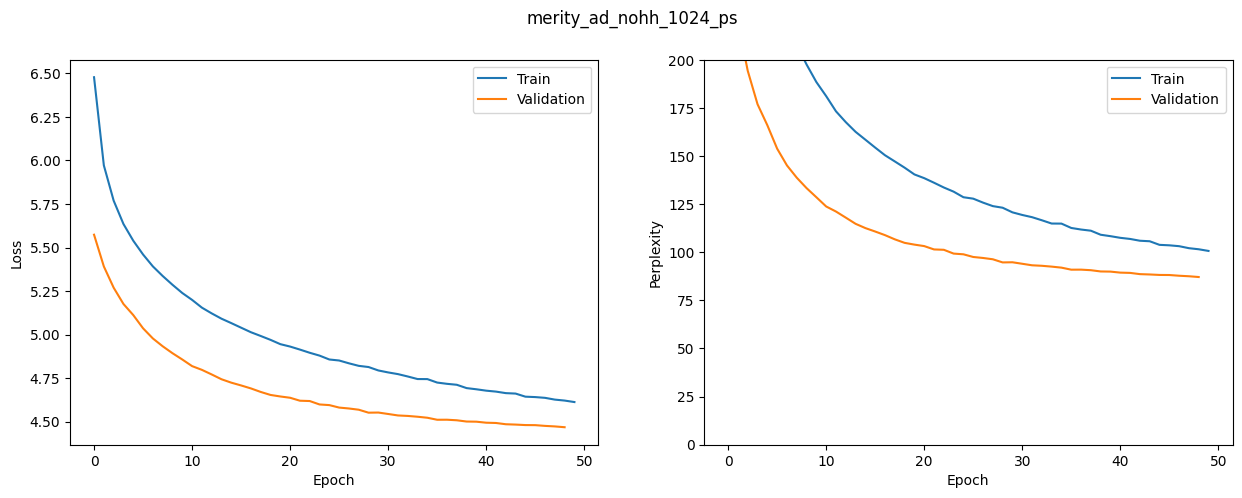

In [23]:
plot_loss_ppl("merity_ad_nohh_1024_ps")

Train last step perplexity: 128.68
Validation last step perplexity: 101.19


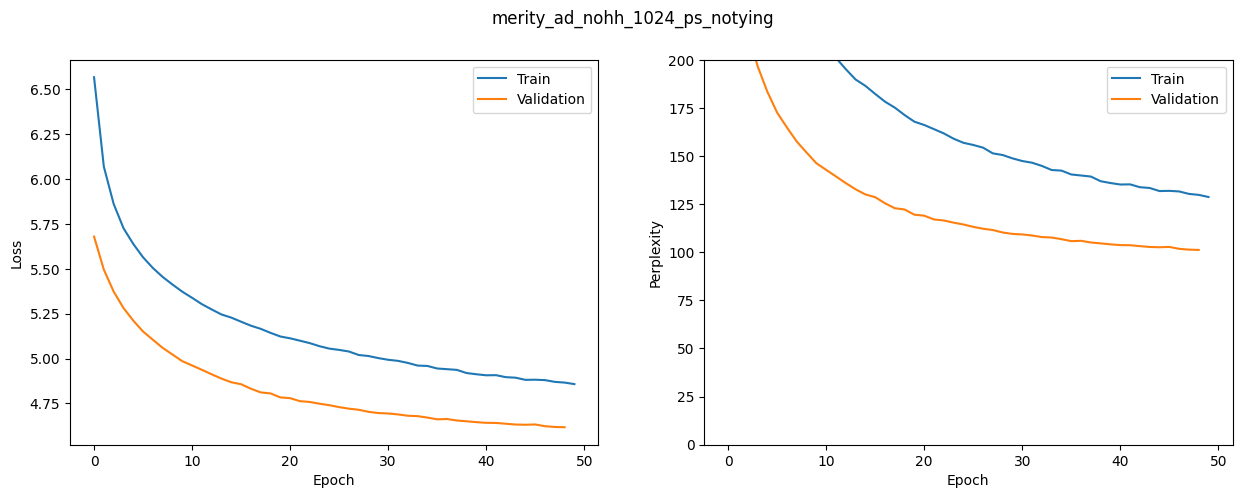

In [24]:
plot_loss_ppl("merity_ad_nohh_1024_ps_notying")

Train last step perplexity: 85.01
Validation last step perplexity: 83.56


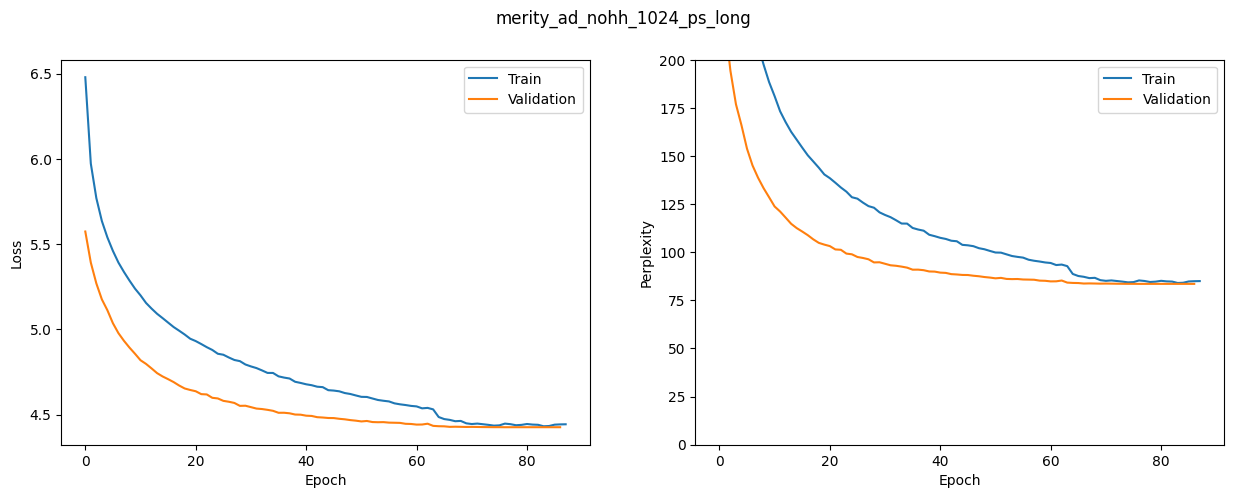

In [25]:
plot_loss_ppl("merity_ad_nohh_1024_ps_long")

Train last step perplexity: 68.50
Validation last step perplexity: 93.57


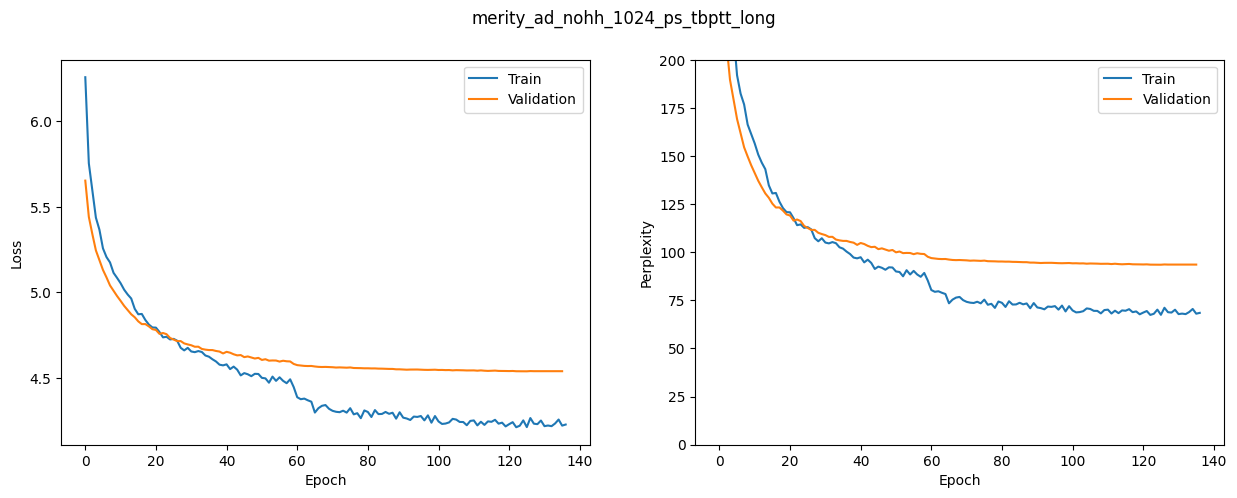

In [26]:
plot_loss_ppl("merity_ad_nohh_1024_ps_tbptt_long")

## Comparisons

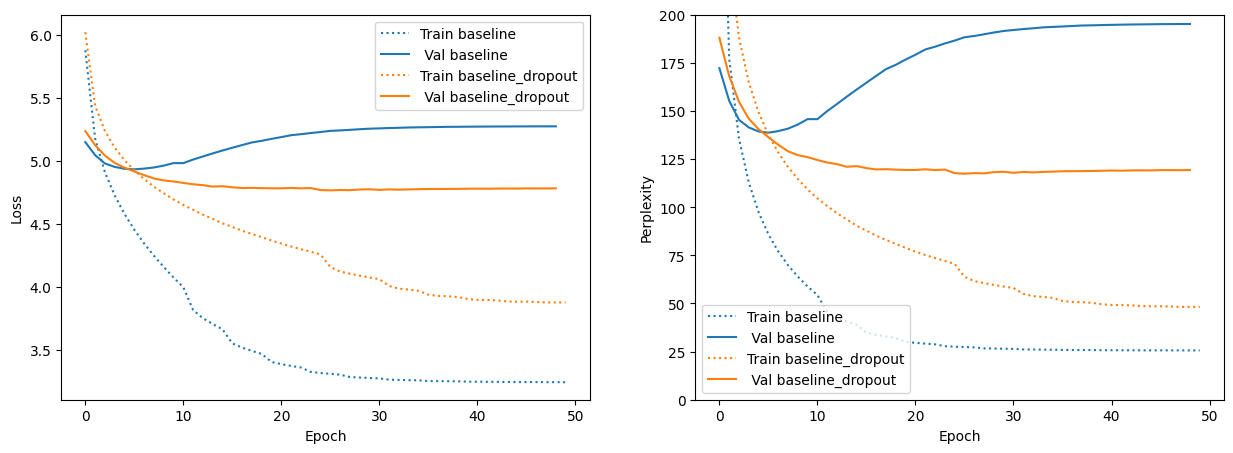

In [27]:
plot_loss_ppl_report(["baseline", "baseline_dropout"])

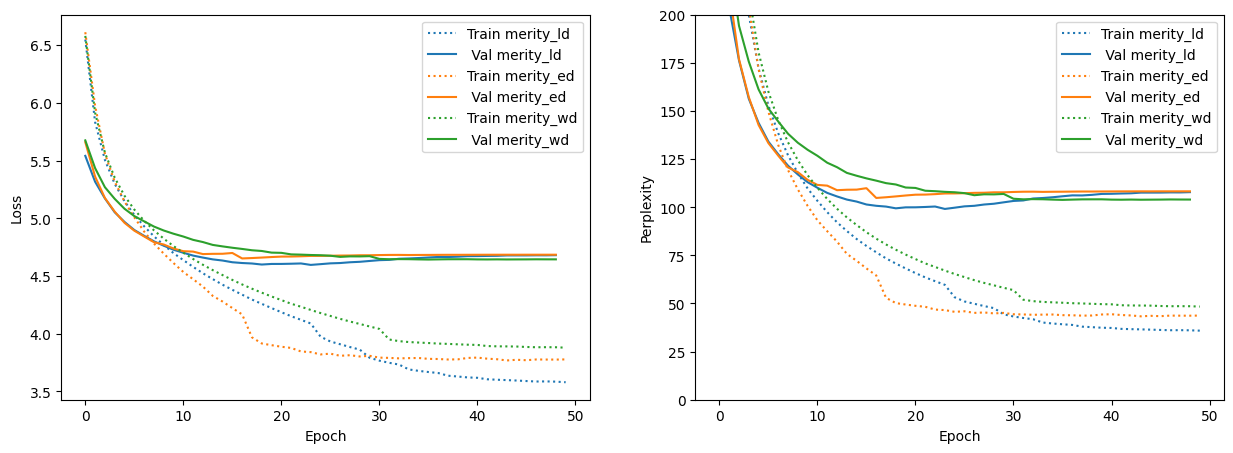

In [28]:
plot_loss_ppl_report(["merity_ld", "merity_ed", "merity_wd"])

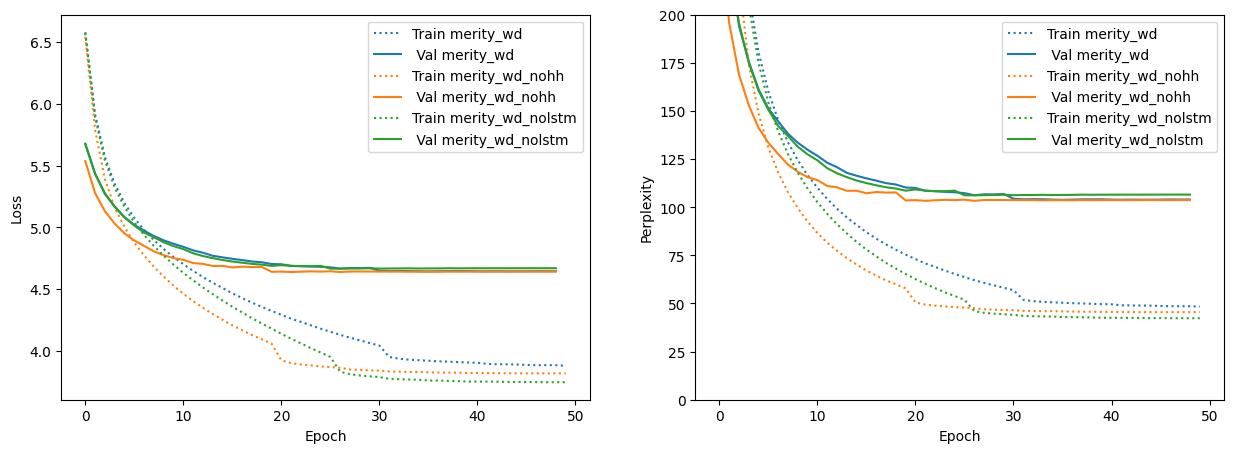

In [29]:
plot_loss_ppl_report(["merity_wd", "merity_wd_nohh", "merity_wd_nolstm"])

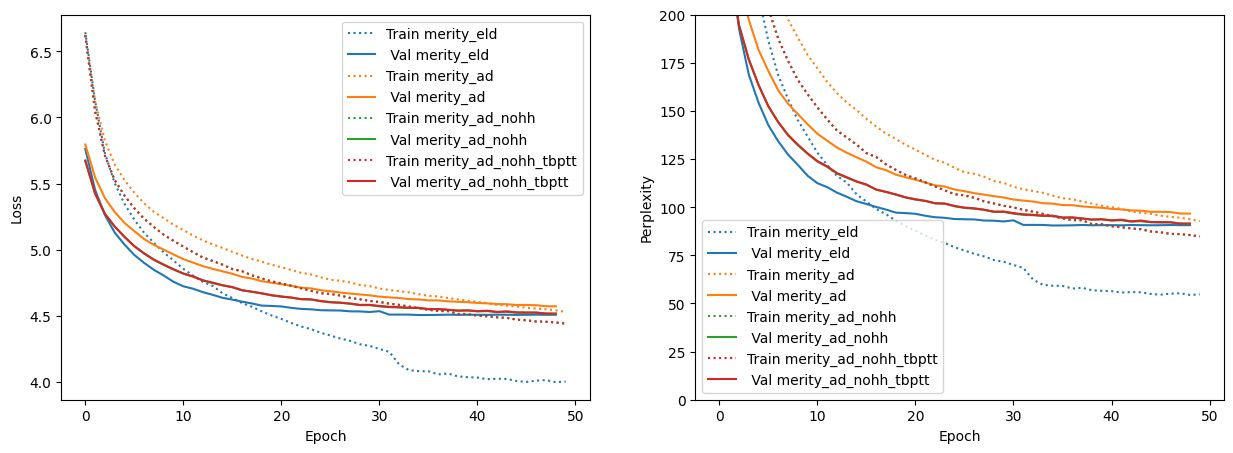

In [30]:
plot_loss_ppl_report(["merity_eld", "merity_ad", "merity_ad_nohh", "merity_ad_nohh_tbptt"])

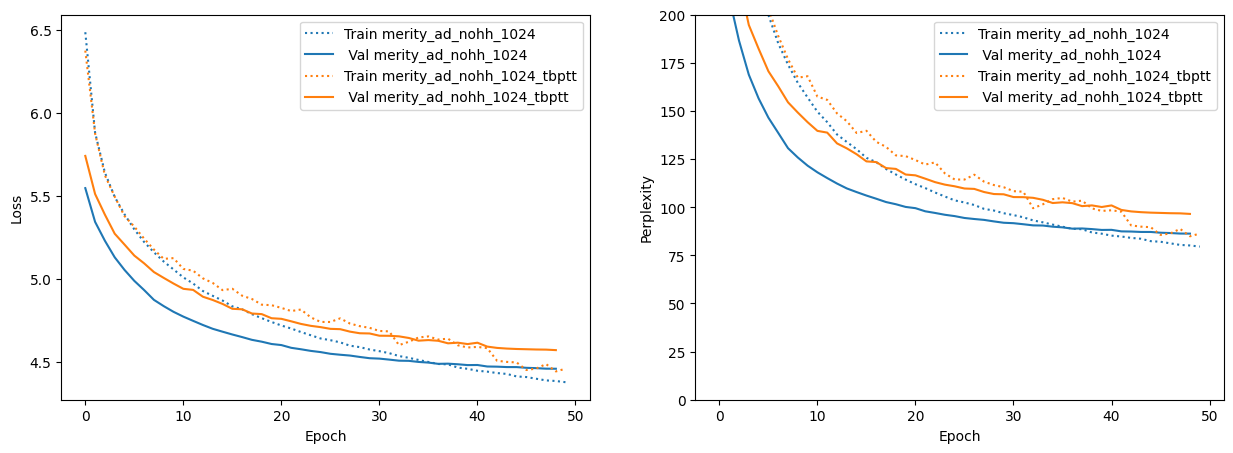

In [31]:
plot_loss_ppl_report([ "merity_ad_nohh_1024", "merity_ad_nohh_1024_tbptt"])

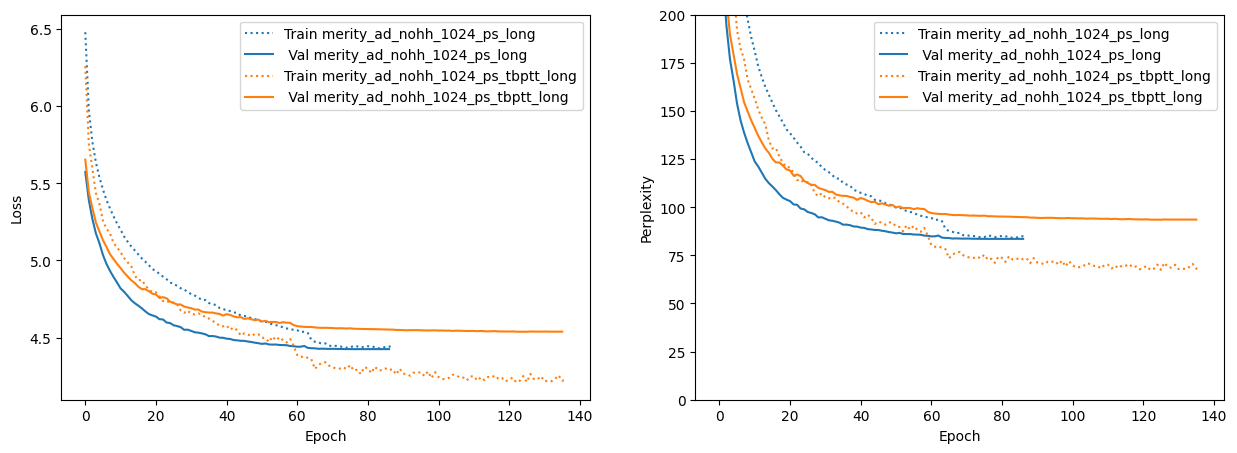

In [32]:
plot_loss_ppl_report([ "merity_ad_nohh_1024_ps_long", "merity_ad_nohh_1024_ps_tbptt_long"])

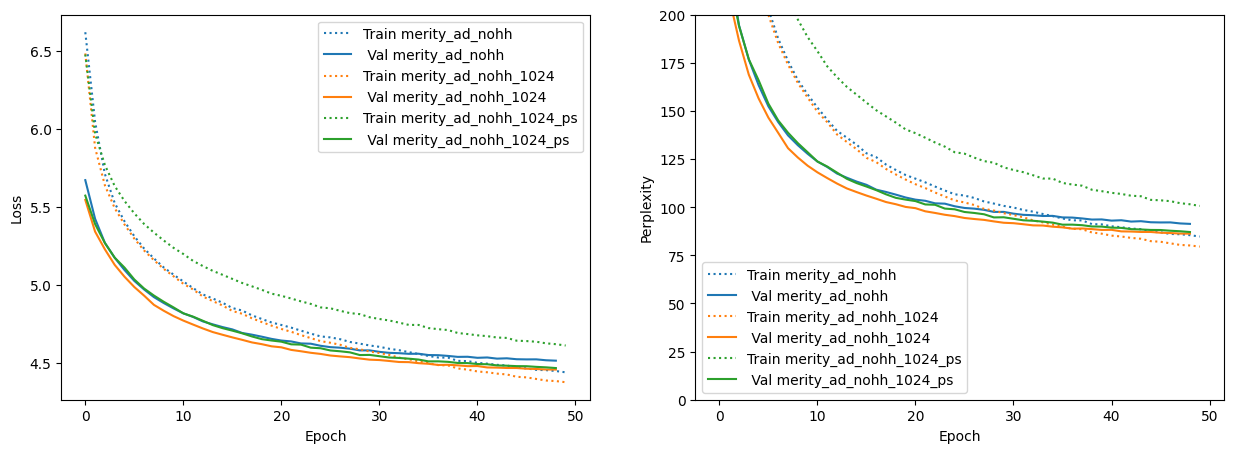

In [11]:
plot_loss_ppl_report(["merity_ad_nohh", "merity_ad_nohh_1024", "merity_ad_nohh_1024_ps"])